Epoch 10, Loss: 0.0209, Accuracy: 72.57%
Epoch 20, Loss: 0.0206, Accuracy: 73.16%
Epoch 30, Loss: 0.0155, Accuracy: 76.56%
Epoch 40, Loss: 0.0122, Accuracy: 79.44%
Epoch 50, Loss: 0.0098, Accuracy: 81.63%
Epoch 60, Loss: 0.0093, Accuracy: 82.31%
Epoch 70, Loss: 0.0089, Accuracy: 82.65%
Epoch 80, Loss: 0.0087, Accuracy: 82.85%
Epoch 90, Loss: 0.0086, Accuracy: 82.89%
Epoch 100, Loss: 0.0086, Accuracy: 82.95%

Final MSE: 5.9169, Final Accuracy: 82.95%


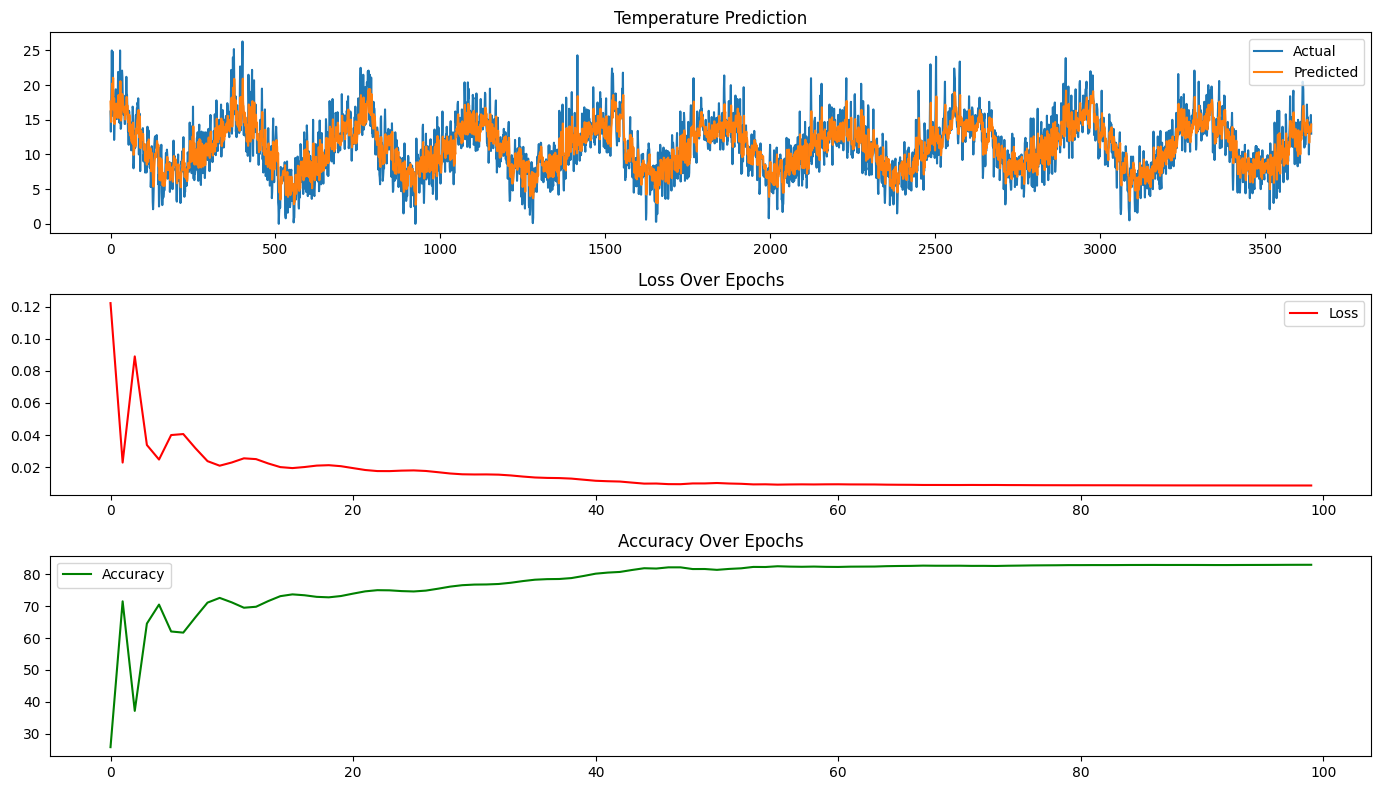

In [3]:
#Time Series Prediction using Recurrent Neural Network (RNN) in PyTorch
#Objective 6
#To train and evaluate a Recurrent Neural Network (RNN) using PyTorch to predict the next value in the International Airline Passengers time series dataset.

#MODEL DESCRIPTION:-
#Dataset:
#The dataset used is the International Airline Passengers dataset.
#It records monthly airline passenger totals from Jan 1949 to Dec 1960.

#Model Architecture:
A simple RNN-based model is used.
Input and output size: 1
Hidden layer size: 32
Recurrent layer: 1
Output layer: Fully connected (Linear)

#Training Details:
Loss function: Mean Squared Error (MSE)
Optimizer: Adam
Learning rate: 0.01
Epochs: 100



import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)

# Use 'Temp' column for prediction
temps = data['Temp'].values.astype(float).reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps)

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 10
X, y = create_sequences(temps_scaled, seq_len)

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32).view(-1, seq_len, 1)
y = torch.tensor(y, dtype=torch.float32)

# Define RNN model
class RNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 32, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
losses, accuracies = [], []
for epoch in range(100):
    model.train()
    output = model(X).squeeze()
    loss = criterion(output, y.squeeze())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Accuracy (custom MAE-based)
    pred_inv = scaler.inverse_transform(output.detach().numpy().reshape(-1, 1))
    actual_inv = scaler.inverse_transform(y.numpy().reshape(-1, 1))
    mae = np.mean(np.abs(pred_inv - actual_inv))
    acc = 1 - mae / np.mean(actual_inv)

    losses.append(loss.item())
    accuracies.append(acc * 100)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc*100:.2f}%")

# Final Evaluation
model.eval()
pred = model(X).detach().numpy()
pred_inv = scaler.inverse_transform(pred)
actual_inv = scaler.inverse_transform(y.numpy().reshape(-1, 1))

mse = np.mean((pred_inv - actual_inv) ** 2)
mae = np.mean(np.abs(pred_inv - actual_inv))
acc = 1 - mae / np.mean(actual_inv)

print(f"\nFinal MSE: {mse:.4f}, Final Accuracy: {acc*100:.2f}%")

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(actual_inv, label='Actual')
plt.plot(pred_inv, label='Predicted')
plt.title("Temperature Prediction")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(losses, label='Loss', color='red')
plt.title("Loss Over Epochs")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(accuracies, label='Accuracy', color='green')
plt.title("Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
#My Comments
#The batch size is not defined; the entire dataset is used due to its small size.
#A plain RNN is used, which works well for small datasets. For larger datasets, LSTM is recommended due to vanishing gradient issues.
#Surprisingly, LSTM performs slightly worse here due to the simplicity of the dataset and lack of long-term dependencies.